In [29]:
import numpy as np
import pandas as pd
from pandas import Series,DataFrame

import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('whitegrid')

%matplotlib inline

from sklearn import linear_model
from sklearn.datasets import load_iris

In [30]:
iris = load_iris()
print(iris.DESCR)

Iris Plants Database

Notes
-----
Data Set Characteristics:
    :Number of Instances: 150 (50 in each of three classes)
    :Number of Attributes: 4 numeric, predictive attributes and the class
    :Attribute Information:
        - sepal length in cm
        - sepal width in cm
        - petal length in cm
        - petal width in cm
        - class:
                - Iris-Setosa
                - Iris-Versicolour
                - Iris-Virginica
    :Summary Statistics:

    ============== ==== ==== ======= ===== ====================
                    Min  Max   Mean    SD   Class Correlation
    ============== ==== ==== ======= ===== ====================
    sepal length:   4.3  7.9   5.84   0.83    0.7826
    sepal width:    2.0  4.4   3.05   0.43   -0.4194
    petal length:   1.0  6.9   3.76   1.76    0.9490  (high!)
    petal width:    0.1  2.5   1.20  0.76     0.9565  (high!)
    ============== ==== ==== ======= ===== ====================

    :Missing Attribute Values: None
  

# Visualizing Data

In [31]:
iris_data = DataFrame(iris.data)
iris_data.columns = iris.feature_names

iris_data.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


In [32]:
iris_target = DataFrame(iris.target, columns = ['Species'])

irish_target.head()

,Species
0,0
1,0
2,0
3,0
4,0


In [33]:
def flower(num):
    ''' Takes in numerical class, returns flower name'''
    if num == 0:
        return 'Setosa'
    elif num == 1:
        return 'Veriscolour'
    else:
        return 'Virginica'

# Apply
iris_target['Species'] = iris_target['Species'].apply(flower)

iris_target.head()

,Species
0,Setosa
1,Setosa
2,Setosa
3,Setosa
4,Setosa


In [34]:
iris_df = pd.concat([iris_data,iris_target],axis=1)

iris_df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),Species
0,5.1,3.5,1.4,0.2,Setosa
1,4.9,3.0,1.4,0.2,Setosa
2,4.7,3.2,1.3,0.2,Setosa
3,4.6,3.1,1.5,0.2,Setosa
4,5.0,3.6,1.4,0.2,Setosa


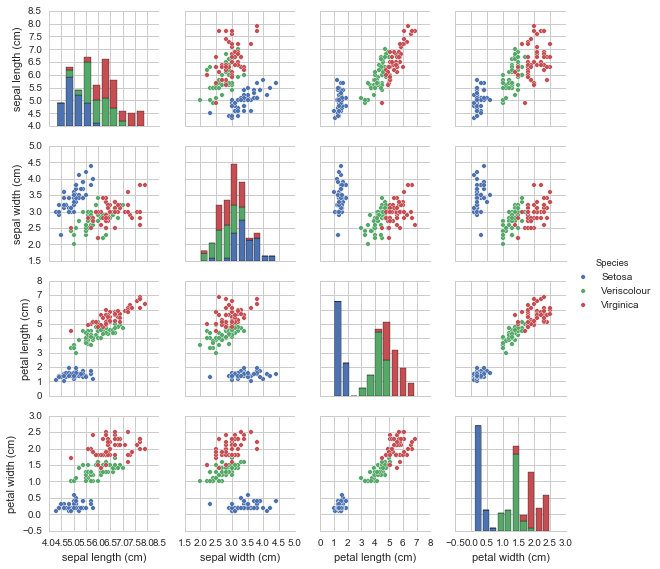

In [35]:
sns.pairplot(iris_df, hue='Species', size=2)

### From the above, it is clear that Setos is clearly separable but the other two overlaps.

# Multi Class Classification using Logistic Regression

In [49]:
from sklearn.linear_model import LogisticRegression
from sklearn.cross_validation import train_test_split


logreg = LogisticRegression()

# Split the data into Trainging and Testing sets
X_train, X_test, Y_train, Y_test = train_test_split(iris.data, iris.target, test_size=0.4,random_state=3)

# Train the model with the training set
logreg.fit(X_train, Y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [43]:
from sklearn import metrics

# Prediction from X_test
Y_pred = logreg.predict(X_test)

#Check accuracy
print('The Accuracy is %.2f'%metrics.accuracy_score(Y_test,Y_pred))

The Accuracy is 0.92


# Multi Class Classification using K Nearest Neighbor

In [44]:
from sklearn.neighbors import KNeighborsClassifier

In [50]:
# We'll first start with 6 Nearest Neighbor i.e. k=3
knn = KNeighborsClassifier(n_neighbors = 3)

knn.fit(X_train,Y_train)

Y_pred = knn.predict(X_test)

print('The Accuracy for 3 Nearest Neighbor is %.2f'% metrics.accuracy_score(Y_test,Y_pred))

The Accuracy for 3 Nearest Neighbor is 0.95


In [51]:
# We'll first start with 6 Nearest Neighbor i.e. k=6
knn = KNeighborsClassifier(n_neighbors = 6)

knn.fit(X_train,Y_train)

Y_pred = knn.predict(X_test)

print('The Accuracy for 6 Nearest Neighbor is %.2f'% metrics.accuracy_score(Y_test,Y_pred))

The Accuracy for 6 Nearest Neighbor is 0.95


### Now we will find out accuracy for a range of K's value

In [52]:
# Test k values 1 through 20
k_range = range(1, 21)

# Set an empty list
accuracy = []

# Repeat above process for all k values and append the result
for k in k_range:
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train, Y_train)
    Y_pred = knn.predict(X_test)
    accuracy.append(metrics.accuracy_score(Y_test, Y_pred))

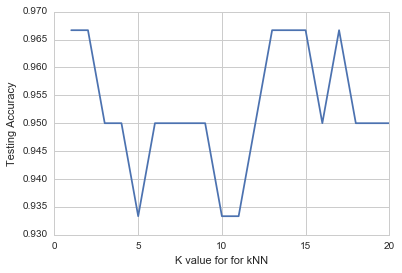

In [53]:
# Plot the accuracies
plt.plot(k_range, accuracy)
plt.xlabel('K value for for kNN')
plt.ylabel('Testing Accuracy')

### From the above plotting we see that when K=2, 13,14,17 the accuracy is highest and when K=5,10,11 the accuracy is lowest